<span style="font-family: Open Sans; font-weight: 800; font-size: 40px; font-style: normal; text-align:center;">

Especialización Inteligencia Artificial - CEIA

</span>

<span style="font-family: Open Sans; font-weight: 700; font-size: 30px; font-style: normal; text-align:center;">

Visión por Computadora I

Trabajo práctico Nro. II

</span>

<span style="font-family: Open Sans; font-weight: 400; font-size: 20px; font-style: normal;">




</span>

# Tabla de Contenido

[Consigna](#Consigna)<br>
[Punto I](#Parte-I)<br>
[Punto II](#Parte-II)<br>
[Punto III](#Parte-II)<br>

# Consigna

▪ Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada
de Fourier.

1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una
imagen para validar el funcionamiento en el dominio espectral.
2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

[inicio](#Tabla-de-contenido)

# Punto 0

[inicio](#Tabla-de-contenido)

In [1]:
# Importamos librerías
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
# Creamos la Función "Create Gauss"

def create_gauss_filter(h, w, k_size, sigma):
    
    # Creamos una matriz de ceros de tamaño h x w
    gauss_filter = np.zeros((h, w))

    # Calculamos el centro del filtro
    center_h, center_w = h // 2, w // 2

    # Creamos el filtro gaussiano utilizando la fórmula
    for i in range(h):
        for j in range(w):
            gauss_filter[i, j] = np.exp(-((i - center_h)**2 + (j - center_w)**2) / (2 * sigma**2))

    # Normalizamos el filtro para que la suma de todos los valores sea igual a 1
    gauss_filter /= np.sum(gauss_filter)

    # Calculamos la Transformada de Fourier del filtro gaussiano
    gauss_filter_fft = np.fft.fft2(gauss_filter)

    return gauss_filter, gauss_filter_fft



# Punto 1

[inicio](#Tabla-de-contenido)

1. a. Graficar ambas representaciones para diferentes tamaños de kernel y sigma.

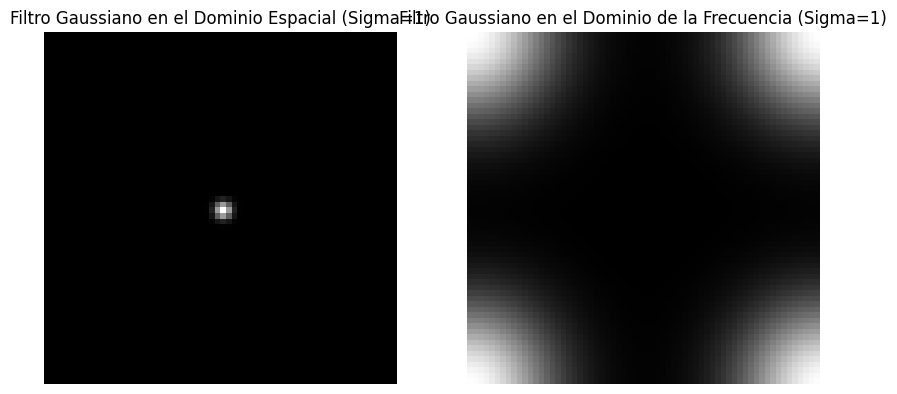

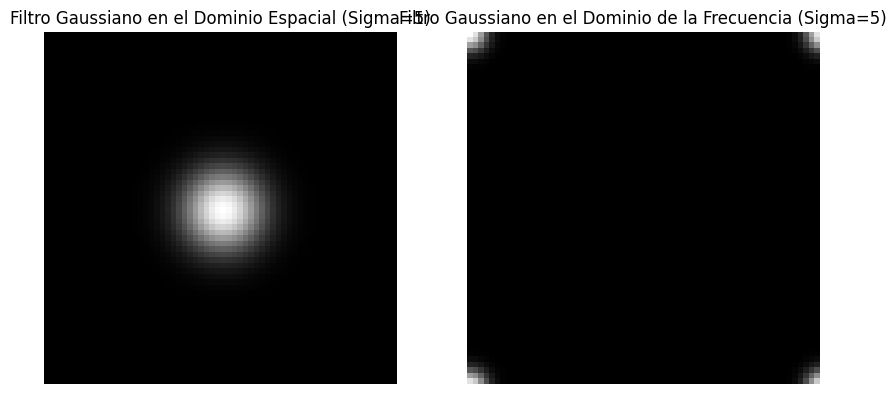

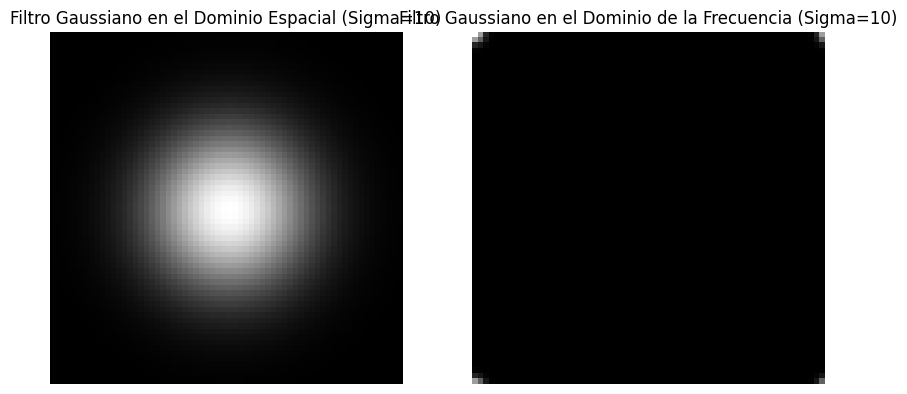

In [3]:
# Seteamos los parámetros para el filtro gaussiano

# Medida del filtro
H, W = 64, 64

# Medida del kernel
k_size = 5

# Valores de sigma
sigma_values = [1, 5, 10]

# Graficamos las representaciones del filtro para diferentes valores de sigma
for sigma in sigma_values:
    gauss_filter, gauss_filter_fft = create_gauss_filter(H, W, k_size, sigma)

    plt.figure(figsize=(10, 5))

    # Representación en el dominio espacial
    plt.subplot(1, 2, 1)
    plt.imshow(gauss_filter, cmap='gray')
    plt.title(f'Filtro Gaussiano en el Dominio Espacial (Sigma={sigma})')
    plt.axis('off')

    # Representación en el dominio de la frecuencia
    plt.subplot(1, 2, 2)
    plt.imshow(np.abs(gauss_filter_fft), cmap='gray')
    plt.title(f'Filtro Gaussiano en el Dominio de la Frecuencia (Sigma={sigma})')
    plt.axis('off')

    plt.show()

1. b. Aplicar el filtro a una imagen para validar el funcionamiento en el dominio espectral.

In [4]:
# Cargamos la imagen
img1 = cv.imread('material_TP2/cirax.jpg', cv.IMREAD_GRAYSCALE)

# La mostramos para chequear que se cargo bien
cv.imshow('Imagen Original 1 - Cirax', img1)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
# Seteamos el valor de sigma y el tamaño del kernel para aplicar el filtro
sigma = 5
k_size = 25

In [6]:
# Función para aplicar el filtro gaussiano en el dominio espacial con "cv.filter2D"
def apply_gauss_filter_spacial(img, sigma, k_size):
    
    # Obtenemos las dimensiones de la imagen
    H, W = img.shape
    
    # Generamos el filtro según las dimensiones de la imagen
    gauss_filter, _ = create_gauss_filter(H, W, k_size, sigma)
    
    # Aplicamos en el dominio espacial
    img_filtered = cv.filter2D(img, -1, gauss_filter, borderType=cv.BORDER_REPLICATE)
    return img_filtered



In [7]:
# Aplicamos el filtro gaussiano a la imagen en el dominio espacial
img1_filtrada_espacial = apply_gauss_filter_spacial(img1, sigma, k_size)

In [8]:
# Función para aplicar el filtro gaussiano en el dominio espectral
def apply_gauss_filter_spectral(img, sigma, k_size):
    # Obtenemos las dimensiones de la imagen
    H, W = img.shape
    
    # Generamos el filtro en el dominio espectral
    _, gauss_filter_espectral = create_gauss_filter(H, W, k_size, sigma)
    
    # Transformamos la imagen original al dominio espectral
    img_fft = np.fft.fft2(img)
    
    # Aplicamos el filtro en el dominio espectral multiplicando las transformadas
    img_filtered_fft = img_fft * gauss_filter_espectral
    
    # Aplicamos la transformada inversa de Fourier para volver al dominio espacial
    img_filtered = np.fft.ifft2(img_filtered_fft)
    
    # Obtenemos el valor real de la parte imaginaria
    img_filtered = np.abs(img_filtered)
    
    # Normalizamos los valores en el rango 0-255 para asegurar que sea una imagen válida
    img_filtered = (img_filtered - np.min(img_filtered)) / (np.max(img_filtered) - np.min(img_filtered))
    img_filtered = (img_filtered * 255).astype(np.uint8)
    
    return img_filtered

In [9]:
# Aplicamos el filtro gaussiano en el dominio de la frecuencia a la imagen
img1_filtrada_espectral = apply_gauss_filter_spectral(img1, sigma, k_size)

In [10]:
# Las mostramos
cv.imshow('Imagen sin filtro - Cirax', img1)
cv.imshow('Imagen con filtro dominio espacial - Cirax', img1_filtrada_espacial)
cv.imshow('Imagen con filtro dominio espectral - Cirax', img1_filtrada_espectral)

cv.waitKey(0)
cv.destroyAllWindows()

# Punto 2

[inicio](#Tabla-de-contenido)

2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.

In [11]:
def calidad_imagen(image):
    M, N = image.shape

    # Calculamos la transformada de Fourier de la imagen
    F = np.fft.fft2(image)

    # Desplazamos el origen de F al centro
    Fc = np.fft.fftshift(F)

    # Calculamos el valor absoluto de la transformada de Fourier centrada
    AF = np.abs(Fc)

    # Calculamos el valor máximo del componente de frecuencia en F
    M_value = np.max(AF)

    # Calculamos el umbral thres
    thres = M_value / 1000

    # Calculamos la medida de calidad de imagen (FM: medida de desenfoque de la imagen en el dominio de la frecuencia)
    TH = np.sum(AF > thres)
    FM = TH / (M * N)

    return FM

In [12]:
# Aplicamos a la imagen sin desenfoque
medida_calidad_2 = calidad_imagen(img1)
print(f"Medida de calidad de imagen sin filtro: {medida_calidad_2}")

# Aplicamos a la imagen en el dominio espacial
medida_calidad = calidad_imagen(img1_filtrada_espacial)
print(f"Medida de calidad de imagen en el dominio espacial: {medida_calidad}")

# Aplicamos a la imagen en el dominio espectral
medida_calidad_2 = calidad_imagen(img1_filtrada_espectral)
print(f"Medida de calidad de imagen en el dominio espectral: {medida_calidad_2}")

Medida de calidad de imagen sin filtro: 0.045544755992061474
Medida de calidad de imagen en el dominio espacial: 0.007175207368581751
Medida de calidad de imagen en el dominio espectral: 0.007358404152460435


Comparación Filtrado por convolución y filtrado espectral

Al aplicar la función se observa que la medida de calidad de la imagen sin filtro es significativamente mayor a las que tienen aplicado el filtro. Por otro lado, las que le hemos aplicado el filtro son muy similares, probablemente se deba a que los parámetros que utilizamos de tamaño kernel y sigma son iguales. Hagamos un par de pruebas mas:

Probamos cambiando el tamaño del kernel solamente

In [44]:
# Seteamos el valor de sigma y el tamaño del kernel para aplicar los filtro
sigma = 5
k_size = 9

In [45]:
# Aplicamos el filtro gaussiano a la imagen en el dominio espacial
img1_filtrada_espacial = apply_gauss_filter_spacial(img1, sigma, k_size)

# Aplicamos el filtro gaussiano en el dominio de la frecuencia a la imagen
img1_filtrada_espectral = apply_gauss_filter_spectral(img1, sigma, k_size)

In [47]:
# Las mostramos
cv.imshow('Imagen sin filtro - Cirax', img1)
cv.imshow('Imagen con filtro dominio espacial - Cirax', img1_filtrada_espacial)
cv.imshow('Imagen con filtro dominio espectral - Cirax', img1_filtrada_espectral)

cv.waitKey(0)
cv.destroyAllWindows()

In [48]:
# Aplicamos a la imagen sin desenfoque
medida_calidad_2 = calidad_imagen(img1)
print(f"Medida de calidad de imagen sin filtro: {medida_calidad_2}")

# Aplicamos a la imagen en el dominio espacial
medida_calidad = calidad_imagen(img1_filtrada_espacial)
print(f"Medida de calidad de imagen en el dominio espacial: {medida_calidad}")

# Aplicamos a la imagen en el dominio espectral
medida_calidad_2 = calidad_imagen(img1_filtrada_espectral)
print(f"Medida de calidad de imagen en el dominio espectral: {medida_calidad_2}")

Medida de calidad de imagen sin filtro: 0.045544755992061474
Medida de calidad de imagen en el dominio espacial: 0.007175207368581751
Medida de calidad de imagen en el dominio espectral: 0.007358404152460435


Ahora probamos cambiando sigma

In [49]:
# Seteamos el valor de sigma y el tamaño del kernel para aplicar los filtro
sigma = 7
k_size = 25

In [50]:
# Aplicamos el filtro gaussiano a la imagen en el dominio espacial
img1_filtrada_espacial = apply_gauss_filter_spacial(img1, sigma, k_size)

# Aplicamos el filtro gaussiano en el dominio de la frecuencia a la imagen
img1_filtrada_espectral = apply_gauss_filter_spectral(img1, sigma, k_size)

In [51]:
# Las mostramos
cv.imshow('Imagen sin filtro - Cirax', img1)
cv.imshow('Imagen con filtro dominio espacial - Cirax', img1_filtrada_espacial)
cv.imshow('Imagen con filtro dominio espectral - Cirax', img1_filtrada_espectral)

cv.waitKey(0)
cv.destroyAllWindows()

In [52]:
# Aplicamos a la imagen sin desenfoque
medida_calidad_2 = calidad_imagen(img1)
print(f"Medida de calidad de imagen sin filtro: {medida_calidad_2}")

# Aplicamos a la imagen en el dominio espacial
medida_calidad = calidad_imagen(img1_filtrada_espacial)
print(f"Medida de calidad de imagen en el dominio espacial: {medida_calidad}")

# Aplicamos a la imagen en el dominio espectral
medida_calidad_2 = calidad_imagen(img1_filtrada_espectral)
print(f"Medida de calidad de imagen en el dominio espectral: {medida_calidad_2}")

Medida de calidad de imagen sin filtro: 0.045544755992061474
Medida de calidad de imagen en el dominio espacial: 0.004610452394280189
Medida de calidad de imagen en el dominio espectral: 0.00493613556562007


Si bien las medidas entre la aplicación del filtro en el dominio del espacio y el dominio de la frecuencia mantienen una relación entre si, se observa que a mayor sigma disminuye la calidad de imagen.

Una prueba mas...

In [53]:
# Seteamos el valor de sigma y el tamaño del kernel para aplicar los filtro
sigma = 2
k_size = 25

In [54]:
# Aplicamos el filtro gaussiano a la imagen en el dominio espacial
img1_filtrada_espacial = apply_gauss_filter_spacial(img1, sigma, k_size)

# Aplicamos el filtro gaussiano en el dominio de la frecuencia a la imagen
img1_filtrada_espectral = apply_gauss_filter_spectral(img1, sigma, k_size)

In [55]:
# Las mostramos
cv.imshow('Imagen sin filtro - Cirax', img1)
cv.imshow('Imagen con filtro dominio espacial - Cirax', img1_filtrada_espacial)
cv.imshow('Imagen con filtro dominio espectral - Cirax', img1_filtrada_espectral)

cv.waitKey(0)
cv.destroyAllWindows()

In [65]:
# Aplicamos a la imagen sin desenfoque
medida_calidad_2 = calidad_imagen(img1)
print(f"Medida de calidad de imagen sin filtro: {medida_calidad_2}")

# Aplicamos a la imagen en el dominio espacial
medida_calidad = calidad_imagen(img1_filtrada_espacial)
print(f"Medida de calidad de imagen en el dominio espacial: {medida_calidad}")

# Aplicamos a la imagen en el dominio espectral
medida_calidad_2 = calidad_imagen(img1_filtrada_espectral)
print(f"Medida de calidad de imagen en el dominio espectral: {medida_calidad_2}")

Medida de calidad de imagen sin filtro: 0.045544755992061474
Medida de calidad de imagen en el dominio espacial: 0.018594473563686327
Medida de calidad de imagen en el dominio espectral: 0.018777670347565008


Efectivamente se observa que a menor sigma, mayor calidad de imagen y, como se ve al mostrarlas, menor desenfoque.Al aumentar el sigma tiende a suavizar los detalles y reducir los contrastes dando como resultado una menor medida de calidad de imagen al aplicar la función.

# Punto 3

[inicio](#Tabla-de-contenido)

3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

Se utilizará el método para calcular la profundidad de una escena en una imagen desenfocada

In [13]:
# Generamos una función para calcular la profundidad de una escena a partir de una imagen desenfocada.
def depth_from_focus(image, focus_function):
    # Obtenemos la transformada de Fourier de la imagen.
    fft_image = np.fft.fft2(image)

    # Generamos las coordenadas x e y de la imagen
    rows, cols = image.shape
    x = np.arange(0, cols)
    y = np.arange(0, rows)
    x, y = np.meshgrid(x, y)

    # Multiplicamos la transformada de Fourier de la imagen por la función de medida de enfoque.
    weighted_fft_image = fft_image * focus_function(x, y)

    # Invertimos la transformada de Fourier de la función.
    depth_image = np.fft.ifft2(weighted_fft_image)

    # Normalizamos la imagen de profundidad.
    depth_image = depth_image / np.max(depth_image)

    return depth_image

# Función de medida de enfoque
def focus_function(x, y):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))

In [14]:
# Seteamos Sigma
sigma = 7

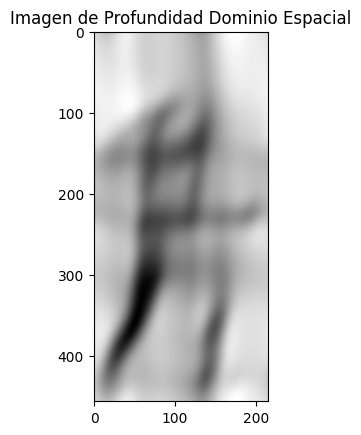

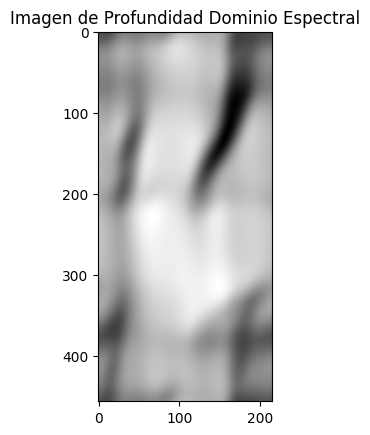

In [15]:
# Calcula la profundidad de la escena en el dominio espacial
depth_img1_espacial = depth_from_focus(img1_filtrada_espacial, focus_function)

# Calcula la profundidad de la escena en el dominio espectral
depth_img1_espectral = depth_from_focus(img1_filtrada_espectral, focus_function)

# Visualiza la imagen de profundidad.
plt.imshow(np.abs(depth_img1_espacial), cmap='gray')
plt.title('Imagen de Profundidad Dominio Espacial')
plt.show()

plt.imshow(np.abs(depth_img1_espectral), cmap='gray')
plt.title('Imagen de Profundidad Dominio Espectral')
plt.show()


In [73]:
# Seteamos Sigma
sigma = 2

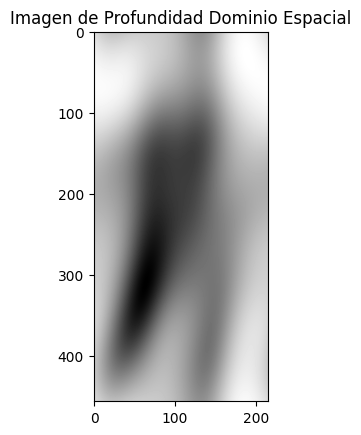

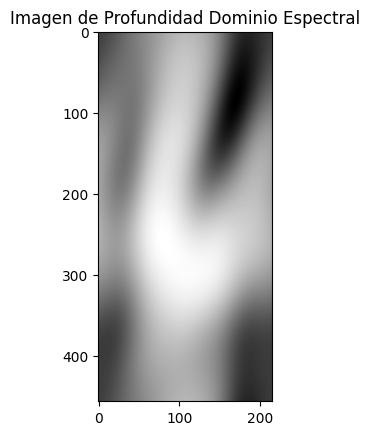

In [74]:
# Calcula la profundidad de la escena en el dominio espacial
depth_img1_espacial = depth_from_focus(img1_filtrada_espacial, focus_function)

# Calcula la profundidad de la escena en el dominio espectral
depth_img1_espectral = depth_from_focus(img1_filtrada_espectral, focus_function)

# Visualiza la imagen de profundidad.
plt.imshow(np.abs(depth_img1_espacial), cmap='gray')
plt.title('Imagen de Profundidad Dominio Espacial')
plt.show()

plt.imshow(np.abs(depth_img1_espectral), cmap='gray')
plt.title('Imagen de Profundidad Dominio Espectral')
plt.show()

Se utilizaron diferentes valores de sigma para implementar la función y visualizar el resultado (7 y 2 respectivamente). Se observa que las imagenes resultantes muestran la profundidad que indican que partes de la imagen están enfocadas y desenfocadas. Vamos a mostrarlo de otra forma:

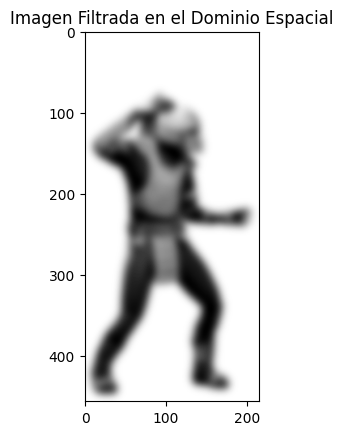

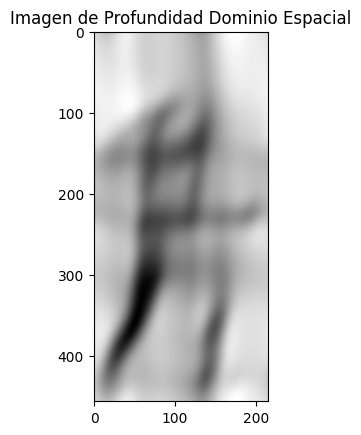

In [16]:
# Visualiza la imagen filtrada en el dominio espacial
plt.imshow(np.abs(img1_filtrada_espacial), cmap='gray')
plt.title('Imagen Filtrada en el Dominio Espacial')
plt.show()

# Visualiza la imagen de profundidad.
plt.imshow(np.abs(depth_img1_espacial), cmap='gray')
plt.title('Imagen de Profundidad Dominio Espacial')
plt.show()

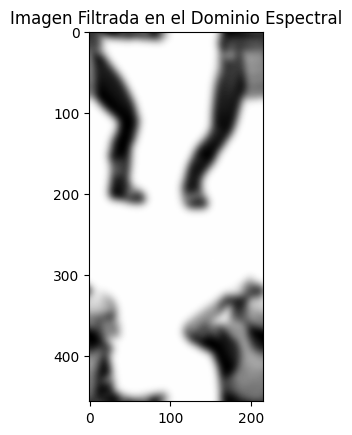

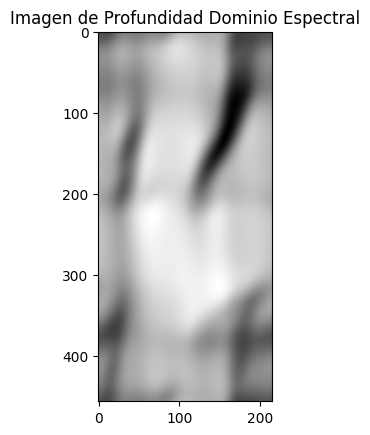

In [17]:
# Visualiza la imagen filtrada en el dominio espectral
plt.imshow(np.abs(img1_filtrada_espectral), cmap='gray')
plt.title('Imagen Filtrada en el Dominio Espectral')
plt.show()

# Visualiza la imagen de profundidad.
plt.imshow(np.abs(depth_img1_espectral), cmap='gray')
plt.title('Imagen de Profundidad Dominio Espectral')
plt.show()

Se observa que las imágenes con filtro son consistentes a las imagen que representa la profundidad, siendo las áreas mas enfocadas representadas con valores mas altos (en este caso el fondo de la imagen) y valores mas bajos la figura desenfocada.